In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Pre-trained SVM model

In [3]:
img = cv2.imread("../opencv-np-workshop/data/img/people.jpg")

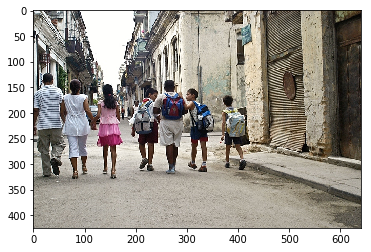

In [4]:
plt.imshow(img[:,:,::-1])

In [5]:
hog = cv2.HOGDescriptor() 

In [6]:
hog.setSVMDetector(cv2.HOGDescriptor.getDefaultPeopleDetector())

In [7]:
locations, weights = hog.detectMultiScale(img)

In [10]:
locations # x,y,w,h coordinates of the bounding rectangles

array([[ 25, 119, 120, 239],
       [170, 137, 104, 207],
       [211, 113, 121, 241],
       [102, 167,  93, 185],
       [276, 153,  93, 186],
       [346, 158,  93, 185]], dtype=int32)

In [11]:
x, y, w, h = locations[0]

In [12]:
out =cv2.rectangle(img, (x,y),(x+w,y+h), (0,255,0), 5)

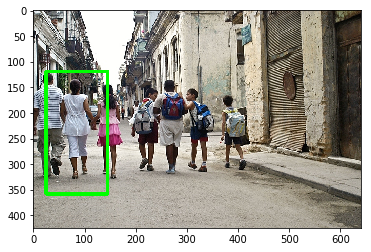

In [13]:
plt.imshow(out[:,:,::-1])

# MobileNet SSD 2017

- Neural network that is only around 28MB.
- Runs on mobile devices. 
- SSD = single-shot detection

In [14]:
nnet = cv2.dnn.readNetFromTensorflow(
    "../opencv-np-workshop/data/nnets/frozen_inference_graph.pb", 
    "../opencv-np-workshop/data/nnets/ssd_mobilenet_v1_coco_2017_11_17.pbtxt"
)

In [26]:
# Equivalence between numeric labels and text\
# MS COCO Dataset
labels_dict =  {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

In [16]:
img = cv2.imread("../opencv-np-workshop/data/img/scenetext01.jpg")
rows, cols, _ = img.shape

In [17]:
blob = cv2.dnn.blobFromImage(img, size=(300,300), swapRB=True, crop=False)

In [18]:
nnet.setInput(blob)

In [19]:
out = nnet.forward()

In [20]:
out.shape

(1, 1, 100, 7)

In [22]:
out[0,0,0,:] # Last 4 values are coordinates of (top_left) and (bottom_right) as pct of the size
            # Second value = Label
            # Third value = detection score

array([0.        , 1.        , 0.6046778 , 0.8450268 , 0.61424446,
       0.9999406 , 1.022562  ], dtype=float32)

In [29]:
for detection in out[0,0,:,:]:
    score = detection[2]
    if score>0.4:
        top_left = (int(detection[3]*cols), int(detection[4]*rows))
        bottom_right = (int(detection[5]*cols), int(detection[6]*rows))
        
        cv2.rectangle(img, top_left, bottom_right, (255,0,0), 2)
        
        # Add a legend with the item type using the labels_dict
        cv2.putText(
            img,
            labels_dict[detection[1]], # Name of the object detected
            top_left, 
            cv2.FONT_HERSHEY_SIMPLEX,
            1, 
            (255,255,255),
            4,
            cv2.LINE_AA # extra flag for nicer text
        )

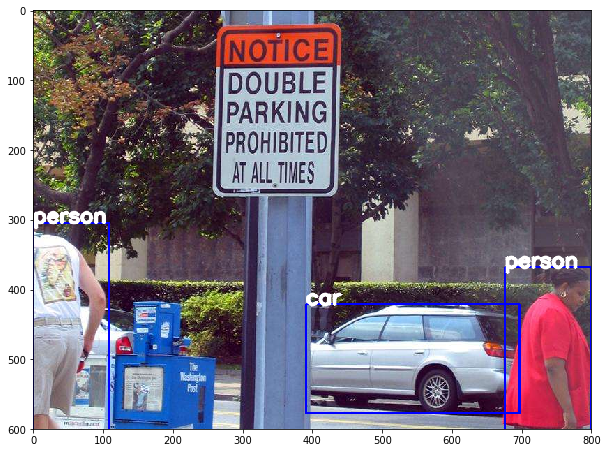

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])